In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

gdf = gpd.read_file(r"C:\Users\jaely\OneDrive\Documents\AES408\cb_2024_01_place_500k\cb_2024_01_place_500k.shp")

print(gdf.head())
print(gdf.columns)
print(gdf.crs)


  STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID        NAME  \
0      01   32704  02403782  1600000US0132704  0132704  Haleyville   
1      01   45472  02406131  1600000US0145472  0145472    McIntosh   
2      01   53784  02406982  1600000US0153784  0153784     Newbern   
3      01   78204  02405634  1600000US0178204  0178204      Valley   
4      01   02836  02405172  1600000US0102836  0102836     Ashford   

          NAMELSAD STUSPS STATE_NAME LSAD     ALAND  AWATER  \
0  Haleyville city     AL    Alabama   25  21713018  130983   
1    McIntosh town     AL    Alabama   43   2579767       0   
2     Newbern town     AL    Alabama   43   3010370    6872   
3      Valley city     AL    Alabama   25  33384157       0   
4     Ashford city     AL    Alabama   25  16064130   56699   

                                            geometry  
0  MULTIPOLYGON (((-87.60417 34.24614, -87.60201 ...  
1  POLYGON ((-88.03726 31.27171, -88.03112 31.271...  
2  POLYGON ((-87.54125 32.60104, -8

In [6]:
gdf = gdf.to_crs(epsg=5070)

gdf["area"]= gdf.geometry.area
gdf["perimeter"] = gdf.geometry.length

gdf["cirularity"] = (4 * np.pi * gdf["area"]) / (gdf["perimeter"] ** 2)

circular_towns = gdf[gdf["cirularity"] > 0.75]

print(circular_towns[["NAME", "cirularity"]])

                  NAME  cirularity
2              Newbern    0.767945
4              Ashford    0.785922
6            Uniontown    0.766067
36            Oak Hill    0.784488
46   Talladega Springs    0.767327
47            Daviston    0.785107
68           Beaverton    0.789951
77              Midway    0.757781
80           Goodwater    0.757094
81          Hayneville    0.784848
85          La Fayette    0.783689
94         Ethelsville    0.782578
108            Hanover    0.784638
116        Vredenburgh    0.757079
125         Carrollton    0.785647
137             Repton    0.769848
143        Five Points    0.783126
168             Petrey    0.780032
170        Mooresville    0.794309
192            Bon Air    0.750319
256             Oakman    0.992406
280            Concord    0.755887
288          Camp Hill    0.784889
289          Goldville    0.984679
307        Frisco City    0.777196
320             Dayton    0.784579
383     Coffee Springs    0.979161
386           Brantl

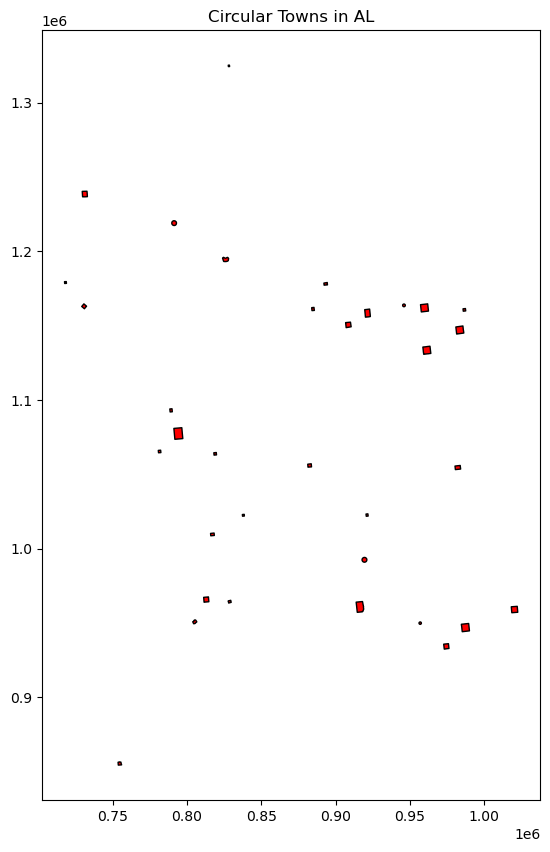

In [7]:

#Failed attempt 
fig, ax = plt.subplots(figsize=(10, 10))
circular_towns.plot(ax=ax, color="red", edgecolor="black")
plt.title("Circular Towns in AL") 
plt.show()

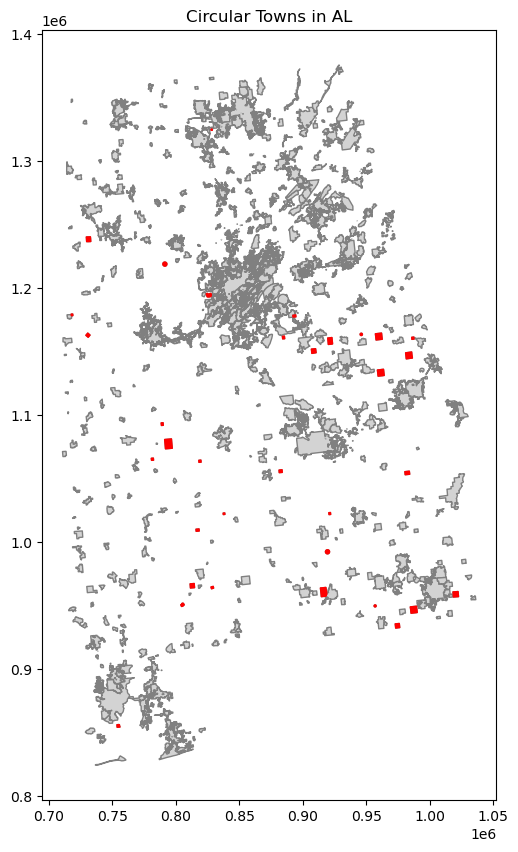

In [8]:
#better attempt
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="lightgray", edgecolor="gray")
circular_towns.plot(ax=ax, color="red", edgecolor="red")
plt.title("Circular Towns in AL") 
plt.show()